# Machine Learning
    By Oghosa Igbinakenzua
    MIE 451 | Decision Support Systems
    October 22, 2017
    
This project involves performing machine learning tasks to train and predict on datasets using supervised learning (classification) techniques and to perform a performance analysis of the learned classifier.

In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### In case that your tqdm is not installed. Please go to the Start(Windows)->Anaconda2(64-bit)->Anaconda Prompt(py35)

### type: conda install tqdm -y

In [2]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import label_binarize
from scipy import stats

C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
# extract data
#!tar -xf 20news-19997.tar.gz -C .
#!gzip -dc 20news-19997.tar.gz | tar -xvzf -

20_newsgroups/
20_newsgroups/alt.atheism/
20_newsgroups/alt.atheism/53366
20_newsgroups/alt.atheism/53367
20_newsgroups/alt.atheism/51247
20_newsgroups/alt.atheism/51248
20_newsgroups/alt.atheism/51249
20_newsgroups/alt.atheism/51250
20_newsgroups/alt.atheism/51251
20_newsgroups/alt.atheism/51252
20_newsgroups/alt.atheism/51253
20_newsgroups/alt.atheism/51254
20_newsgroups/alt.atheism/51255
20_newsgroups/alt.atheism/53070
20_newsgroups/alt.atheism/53071
20_newsgroups/alt.atheism/53072
20_newsgroups/alt.atheism/53090
20_newsgroups/alt.atheism/53134
20_newsgroups/alt.atheism/53135
20_newsgroups/alt.atheism/53136
20_newsgroups/alt.atheism/53137
20_newsgroups/alt.atheism/53138
20_newsgroups/alt.atheism/53139
20_newsgroups/alt.atheism/53140
20_newsgroups/alt.atheism/53141
20_newsgroups/alt.atheism/53142
20_newsgroups/alt.atheism/54125
20_newsgroups/alt.atheism/53213
20_newsgroups/alt.atheism/53214
20_newsgroups/alt.atheism/53215
20_newsgroups/alt.atheism/53216
20_newsgroups/alt.atheism/5321

20_newsgroups/alt.atheism/53094
20_newsgroups/alt.atheism/53095
20_newsgroups/alt.atheism/53096
20_newsgroups/alt.atheism/53097
20_newsgroups/alt.atheism/53098
20_newsgroups/alt.atheism/53099
20_newsgroups/alt.atheism/53100
20_newsgroups/alt.atheism/53101
20_newsgroups/alt.atheism/53102
20_newsgroups/alt.atheism/53103
20_newsgroups/alt.atheism/53104
20_newsgroups/alt.atheism/53105
20_newsgroups/alt.atheism/53106
20_newsgroups/alt.atheism/53107
20_newsgroups/alt.atheism/53108
20_newsgroups/alt.atheism/53109
20_newsgroups/alt.atheism/53110
20_newsgroups/alt.atheism/53111
20_newsgroups/alt.atheism/53112
20_newsgroups/alt.atheism/53113
20_newsgroups/alt.atheism/53114
20_newsgroups/alt.atheism/53115
20_newsgroups/alt.atheism/53116
20_newsgroups/alt.atheism/53117
20_newsgroups/alt.atheism/53118
20_newsgroups/alt.atheism/53119
20_newsgroups/alt.atheism/53120
20_newsgroups/alt.atheism/53121
20_newsgroups/alt.atheism/53122
20_newsgroups/alt.atheism/53123
20_newsgroups/alt.atheism/53124
20_newsg

20_newsgroups/comp.graphics/38555
20_newsgroups/comp.graphics/37949
20_newsgroups/comp.graphics/37939
20_newsgroups/comp.graphics/37940
20_newsgroups/comp.graphics/37950
20_newsgroups/comp.graphics/38277
20_newsgroups/comp.graphics/37951
20_newsgroups/comp.graphics/37952
20_newsgroups/comp.graphics/38556
20_newsgroups/comp.graphics/38557
20_newsgroups/comp.graphics/38903
20_newsgroups/comp.graphics/37953
20_newsgroups/comp.graphics/37954
20_newsgroups/comp.graphics/37955
20_newsgroups/comp.graphics/37956
20_newsgroups/comp.graphics/38704
20_newsgroups/comp.graphics/37957
20_newsgroups/comp.graphics/37958
20_newsgroups/comp.graphics/38319
20_newsgroups/comp.graphics/38320
20_newsgroups/comp.graphics/38321
20_newsgroups/comp.graphics/38322
20_newsgroups/comp.graphics/38323
20_newsgroups/comp.graphics/38324
20_newsgroups/comp.graphics/38325
20_newsgroups/comp.graphics/38326
20_newsgroups/comp.graphics/38327
20_newsgroups/comp.graphics/38328
20_newsgroups/comp.graphics/38329
20_newsgroups/

20_newsgroups/comp.graphics/38679
20_newsgroups/comp.graphics/38693
20_newsgroups/comp.graphics/38695
20_newsgroups/comp.graphics/38696
20_newsgroups/comp.graphics/38697
20_newsgroups/comp.graphics/38698
20_newsgroups/comp.graphics/38699
20_newsgroups/comp.graphics/38700
20_newsgroups/comp.graphics/38701
20_newsgroups/comp.graphics/38702
20_newsgroups/comp.graphics/38703
20_newsgroups/comp.graphics/38709
20_newsgroups/comp.graphics/38710
20_newsgroups/comp.graphics/38711
20_newsgroups/comp.graphics/38712
20_newsgroups/comp.graphics/38713
20_newsgroups/comp.graphics/38714
20_newsgroups/comp.graphics/38715
20_newsgroups/comp.graphics/38716
20_newsgroups/comp.graphics/38717
20_newsgroups/comp.graphics/38718
20_newsgroups/comp.graphics/38623
20_newsgroups/comp.graphics/38624
20_newsgroups/comp.graphics/38720
20_newsgroups/comp.graphics/38625
20_newsgroups/comp.graphics/38626
20_newsgroups/comp.graphics/38627
20_newsgroups/comp.graphics/38628
20_newsgroups/comp.graphics/38629
20_newsgroups/

20_newsgroups/comp.os.ms-windows.misc/9733
20_newsgroups/comp.os.ms-windows.misc/9734
20_newsgroups/comp.os.ms-windows.misc/9514
20_newsgroups/comp.os.ms-windows.misc/9735
20_newsgroups/comp.os.ms-windows.misc/9736
20_newsgroups/comp.os.ms-windows.misc/9737
20_newsgroups/comp.os.ms-windows.misc/9738
20_newsgroups/comp.os.ms-windows.misc/9739
20_newsgroups/comp.os.ms-windows.misc/9740

20_newsgroups/comp.os.ms-windows.misc/10149
20_newsgroups/comp.os.ms-windows.misc/10150
20_newsgroups/comp.os.ms-windows.misc/10151
20_newsgroups/comp.os.ms-windows.misc/10152
20_newsgroups/comp.os.ms-windows.misc/10153
20_newsgroups/comp.os.ms-windows.misc/10154
20_newsgroups/comp.os.ms-windows.misc/10155
20_newsgroups/comp.os.ms-windows.misc/10156
20_newsgroups/comp.os.ms-windows.misc/10157
20_newsgroups/comp.os.ms-windows.misc/10158
20_newsgroups/comp.os.ms-windows.misc/10159
20_newsgroups/comp.os.ms-windows.misc/10160
20_newsgroups/comp.os.ms-windows.misc/10161
20_newsgroups/comp.os.ms-windows.misc/10

20_newsgroups/comp.sys.ibm.pc.hardware/61114
20_newsgroups/comp.sys.ibm.pc.hardware/61115
20_newsgroups/comp.sys.ibm.pc.hardware/61116
20_newsgroups/comp.sys.ibm.pc.hardware/61119
20_newsgroups/comp.sys.ibm.pc.hardware/61120
20_newsgroups/comp.sys.ibm.pc.hardware/61121
20_newsgroups/comp.sys.ibm.pc.hardware/61122
20_newsgroups/comp.sys.ibm.pc.hardware/61123
20_newsgroups/comp.sys.ibm.pc.hardware/61151
20_newsgroups/comp.sys.ibm.pc.hardware/61152
20_newsgroups/comp.sys.ibm.pc.hardware/61156
20_newsgroups/comp.sys.ibm.pc.hardware/61157
20_newsgroups/comp.sys.ibm.pc.hardware/61158
20_newsgroups/comp.sys.ibm.pc.hardware/61160
20_newsgroups/comp.sys.ibm.pc.hardware/61161
20_newsgroups/comp.sys.ibm.pc.hardware/61162
20_newsgroups/comp.sys.ibm.pc.hardware/61163
20_newsgroups/comp.sys.ibm.pc.hardware/61164
20_newsgroups/comp.sys.ibm.pc.hardware/61165
20_newsgroups/comp.sys.ibm.pc.hardware/61166
20_newsgroups/comp.sys.ibm.pc.hardware/61167
20_newsgroups/comp.sys.ibm.pc.hardware/61168
20_newsgro

20_newsgroups/comp.sys.mac.hardware/51651
20_newsgroups/comp.sys.mac.hardware/51652
20_newsgroups/comp.sys.mac.hardware/51653
20_newsgroups/comp.sys.mac.hardware/51654
20_newsgroups/comp.sys.mac.hardware/51655
20_newsgroups/comp.sys.mac.hardware/51656
20_newsgroups/comp.sys.mac.hardware/51657
20_newsgroups/comp.sys.mac.hardware/51658
20_newsgroups/comp.sys.mac.hardware/51659
20_newsgroups/comp.sys.mac.hardware/51660

20_newsgroups/comp.windows.x/67346
20_newsgroups/comp.windows.x/67347
20_newsgroups/comp.windows.x/67349
20_newsgroups/comp.windows.x/67350
20_newsgroups/comp.windows.x/67351
20_newsgroups/comp.windows.x/67416
20_newsgroups/comp.windows.x/67417
20_newsgroups/comp.windows.x/67418
20_newsgroups/comp.windows.x/67419
20_newsgroups/comp.windows.x/67420
20_newsgroups/comp.windows.x/67421
20_newsgroups/comp.windows.x/67379
20_newsgroups/comp.windows.x/67422
20_newsgroups/comp.windows.x/67423
20_newsgroups/comp.windows.x/67424
20_newsgroups/comp.windows.x/67425
20_newsgroups/comp.

20_newsgroups/misc.forsale/76356
20_newsgroups/misc.forsale/76357
20_newsgroups/misc.forsale/76358
20_newsgroups/misc.forsale/76359
20_newsgroups/misc.forsale/76360
20_newsgroups/misc.forsale/76361
20_newsgroups/misc.forsale/76362
20_newsgroups/misc.forsale/76364
20_newsgroups/misc.forsale/76365
20_newsgroups/misc.forsale/76366
20_newsgroups/misc.forsale/76367
20_newsgroups/misc.forsale/77056
20_newsgroups/misc.forsale/76372
20_newsgroups/misc.forsale/76537
20_newsgroups/misc.forsale/76538
20_newsgroups/misc.forsale/76545
20_newsgroups/misc.forsale/76945
20_newsgroups/misc.forsale/76546
20_newsgroups/misc.forsale/76373
20_newsgroups/misc.forsale/76378
20_newsgroups/misc.forsale/76431
20_newsgroups/misc.forsale/76379
20_newsgroups/misc.forsale/76547
20_newsgroups/misc.forsale/76380
20_newsgroups/misc.forsale/76381
20_newsgroups/misc.forsale/76382
20_newsgroups/misc.forsale/76391
20_newsgroups/misc.forsale/76393
20_newsgroups/misc.forsale/76394
20_newsgroups/misc.forsale/76395
20_newsgro

20_newsgroups/rec.motorcycles/104619
20_newsgroups/rec.motorcycles/104620
20_newsgroups/rec.motorcycles/104621
20_newsgroups/rec.motorcycles/104622
20_newsgroups/rec.motorcycles/104623
20_newsgroups/rec.motorcycles/104624
20_newsgroups/rec.motorcycles/104625
20_newsgroups/rec.motorcycles/104626
20_newsgroups/rec.motorcycles/104627
20_newsgroups/rec.motorcycles/104628
20_newsgroups/rec.motorcycles/104629
20_newsgroups/rec.motorcycles/104630
20_newsgroups/rec.motorcycles/104631
20_newsgroups/rec.motorcycles/104632
20_newsgroups/rec.motorcycles/104633
20_newsgroups/rec.motorcycles/104634
20_newsgroups/rec.motorcycles/104635
20_newsgroups/rec.motorcycles/104636
20_newsgroups/rec.motorcycles/104637
20_newsgroups/rec.motorcycles/104638
20_newsgroups/rec.motorcycles/104639
20_newsgroups/rec.motorcycles/104640
20_newsgroups/rec.motorcycles/104641
20_newsgroups/rec.motorcycles/104642
20_newsgroups/rec.motorcycles/104643
20_newsgroups/rec.motorcycles/104644
20_newsgroups/rec.motorcycles/103117
2

20_newsgroups/rec.sport.baseball/105101
20_newsgroups/rec.sport.baseball/105102
20_newsgroups/rec.sport.baseball/105103
20_newsgroups/rec.sport.baseball/105104
20_newsgroups/rec.sport.baseball/105105
20_newsgroups/rec.sport.baseball/105106
20_newsgroups/rec.sport.baseball/105107
20_newsgroups/rec.sport.baseball/105108
20_newsgroups/rec.sport.baseball/105109
20_newsgroups/rec.sport.baseball/105110
20_newsgroups/rec.sport.baseball/105111
20_newsgroups/rec.sport.baseball/105112
20_newsgroups/rec.sport.baseball/105113
20_newsgroups/rec.sport.baseball/105114
20_newsgroups/rec.sport.baseball/105115
20_newsgroups/rec.sport.baseball/105116
20_newsgroups/rec.sport.baseball/105117
20_newsgroups/rec.sport.baseball/105118
20_newsgroups/rec.sport.baseball/105119
20_newsgroups/rec.sport.baseball/105120
20_newsgroups/rec.sport.baseball/105121
20_newsgroups/rec.sport.baseball/105122
20_newsgroups/rec.sport.baseball/105123
20_newsgroups/rec.sport.baseball/105124
20_newsgroups/rec.sport.baseball/103587


20_newsgroups/sci.crypt/15720
20_newsgroups/sci.crypt/15721
20_newsgroups/sci.crypt/15722
20_newsgroups/sci.crypt/15723
20_newsgroups/sci.crypt/15724
20_newsgroups/sci.crypt/15725
20_newsgroups/sci.crypt/15726
20_newsgroups/sci.crypt/15727
20_newsgroups/sci.crypt/15728
20_newsgroups/sci.crypt/15729
20_newsgroups/sci.crypt/15730
20_newsgroups/sci.crypt/15731
20_newsgroups/sci.crypt/15732
20_newsgroups/sci.crypt/15733
20_newsgroups/sci.crypt/15734
20_newsgroups/sci.crypt/15735
20_newsgroups/sci.crypt/15736
20_newsgroups/sci.crypt/15737
20_newsgroups/sci.crypt/15738
20_newsgroups/sci.crypt/15739
20_newsgroups/sci.crypt/15740
20_newsgroups/sci.crypt/15741
20_newsgroups/sci.crypt/15742
20_newsgroups/sci.crypt/15743
20_newsgroups/sci.crypt/15744
20_newsgroups/sci.crypt/15745
20_newsgroups/sci.crypt/15746
20_newsgroups/sci.crypt/15747
20_newsgroups/sci.crypt/15748
20_newsgroups/sci.crypt/15749
20_newsgroups/sci.crypt/15750
20_newsgroups/sci.crypt/15751
20_newsgroups/sci.crypt/15752
20_newsgro

20_newsgroups/sci.med/58919
20_newsgroups/sci.med/58920
20_newsgroups/sci.med/58921
20_newsgroups/sci.med/58922
20_newsgroups/sci.med/58923
20_newsgroups/sci.med/58924
20_newsgroups/sci.med/58925
20_newsgroups/sci.med/58926
20_newsgroups/sci.med/58927
20_newsgroups/sci.med/58928
20_newsgroups/sci.med/58929
20_newsgroups/sci.med/58930
20_newsgroups/sci.med/58931
20_newsgroups/sci.med/58932
20_newsgroups/sci.med/58933
20_newsgroups/sci.med/58934
20_newsgroups/sci.med/58935
20_newsgroups/sci.med/58936
20_newsgroups/sci.med/58937
20_newsgroups/sci.med/58938
20_newsgroups/sci.med/58939
20_newsgroups/sci.med/58940
20_newsgroups/sci.med/58941
20_newsgroups/sci.med/58942
20_newsgroups/sci.med/58943
20_newsgroups/sci.med/58944
20_newsgroups/sci.med/58945
20_newsgroups/sci.med/59337
20_newsgroups/sci.med/58946
20_newsgroups/sci.med/58947
20_newsgroups/sci.med/58948
20_newsgroups/sci.med/58949
20_newsgroups/sci.med/58950
20_newsgroups/sci.med/58951
20_newsgroups/sci.med/58952
20_newsgroups/sci.me

20_newsgroups/soc.religion.christian/20550
20_newsgroups/soc.religion.christian/20551
20_newsgroups/soc.religion.christian/20552
20_newsgroups/soc.religion.christian/20553
20_newsgroups/soc.religion.christian/20554
20_newsgroups/soc.religion.christian/20555
20_newsgroups/soc.religion.christian/20556
20_newsgroups/soc.religion.christian/20557
20_newsgroups/soc.religion.christian/20558
20_newsgroups/soc.religion.christian/20559
20_newsgroups/soc.religion.christian/20560
20_newsgroups/soc.religion.christian/20561
20_newsgroups/soc.religion.christian/20562
20_newsgroups/soc.religion.christian/20563
20_newsgroups/soc.religion.christian/20564
20_newsgroups/soc.religion.christian/20565
20_newsgroups/soc.religion.christian/20566
20_newsgroups/soc.religion.christian/20567
20_newsgroups/soc.religion.christian/20568
20_newsgroups/soc.religion.christian/20569
20_newsgroups/soc.religion.christian/20570
20_newsgroups/soc.religion.christian/20571
20_newsgroups/soc.religion.christian/20572
20_newsgrou

20_newsgroups/talk.politics.guns/54411
20_newsgroups/talk.politics.guns/54412
20_newsgroups/talk.politics.guns/54413
20_newsgroups/talk.politics.guns/54414
20_newsgroups/talk.politics.guns/53293
20_newsgroups/talk.politics.guns/53294
20_newsgroups/talk.politics.guns/53295
20_newsgroups/talk.politics.guns/53296
20_newsgroups/talk.politics.guns/53311
20_newsgroups/talk.politics.guns/53312
20_newsgroups/talk.politics.guns/53313
20_newsgroups/talk.politics.guns/53314
20_newsgroups/talk.politics.guns/53315
20_newsgroups/talk.politics.guns/53316
20_newsgroups/talk.politics.guns/55048
20_newsgroups/talk.politics.guns/55049
20_newsgroups/talk.politics.guns/55050
20_newsgroups/talk.politics.guns/55051
20_newsgroups/talk.politics.guns/55052
20_newsgroups/talk.politics.guns/55053
20_newsgroups/talk.politics.guns/55054
20_newsgroups/talk.politics.guns/55055
20_newsgroups/talk.politics.guns/55056
20_newsgroups/talk.politics.guns/55057
20_newsgroups/talk.politics.guns/54866
20_newsgroups/talk.politi

20_newsgroups/talk.politics.mideast/77200
20_newsgroups/talk.politics.mideast/77201
20_newsgroups/talk.politics.mideast/77202
20_newsgroups/talk.politics.mideast/77203
20_newsgroups/talk.politics.mideast/77204
20_newsgroups/talk.politics.mideast/77205
20_newsgroups/talk.politics.mideast/77206
20_newsgroups/talk.politics.mideast/77207
20_newsgroups/talk.politics.mideast/77223
20_newsgroups/talk.politics.mideast/77224
20_newsgroups/talk.politics.mideast/77225
20_newsgroups/talk.politics.mideast/77226
20_newsgroups/talk.politics.mideast/77227
20_newsgroups/talk.politics.mideast/77228
20_newsgroups/talk.politics.mideast/77229
20_newsgroups/talk.politics.mideast/77231
20_newsgroups/talk.politics.mideast/77232
20_newsgroups/talk.politics.mideast/77233
20_newsgroups/talk.politics.mideast/77234
20_newsgroups/talk.politics.mideast/77235
20_newsgroups/talk.politics.mideast/77236
20_newsgroups/talk.politics.mideast/77237
20_newsgroups/talk.politics.mideast/77238
20_newsgroups/talk.politics.mideas

20_newsgroups/talk.religion.misc/84338
20_newsgroups/talk.religion.misc/84363
20_newsgroups/talk.religion.misc/84380
20_newsgroups/talk.religion.misc/84395
20_newsgroups/talk.religion.misc/84396
20_newsgroups/talk.religion.misc/84397
20_newsgroups/talk.religion.misc/84398
20_newsgroups/talk.religion.misc/84399
20_newsgroups/talk.religion.misc/84400
20_newsgroups/talk.religion.misc/84401
20_newsgroups/talk.religion.misc/84402
20_newsgroups/talk.religion.misc/84403
20_newsgroups/talk.religion.misc/84413
20_newsgroups/talk.religion.misc/84414
20_newsgroups/talk.religion.misc/84422
20_newsgroups/talk.religion.misc/84423
20_newsgroups/talk.religion.misc/84428
20_newsgroups/talk.religion.misc/84429
20_newsgroups/talk.religion.misc/84430
20_newsgroups/talk.religion.misc/84431
20_newsgroups/talk.religion.misc/84432
20_newsgroups/talk.religion.misc/84433
20_newsgroups/talk.religion.misc/84434
20_newsgroups/talk.religion.misc/84435
20_newsgroups/talk.religion.misc/84436
20_newsgroups/talk.religi

In [9]:
# display newsgroups directories
!ls 20_newsgroups

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## Support functions

In [3]:
def getFilesDirectory(datapath='20_newsgroups'):
    # create file directory for all files
    files = []
    for (path, dirnames, filenames) in os.walk(datapath):
        files.extend(os.path.join(path, name) for name in filenames)
    # putting file directories into pandas dataframe
    directorydf= pd.DataFrame(files)
    directorydf.columns = ['Directories']
    return directorydf

In [4]:
directorydf = getFilesDirectory().sample(frac=1)
directorydf[2000:2050]

,Directories
15738,20_newsgroups\soc.religion.christian\21550
16546,20_newsgroups\talk.politics.guns\54584
10602,20_newsgroups\rec.sport.hockey\54002
19359,20_newsgroups\talk.religion.misc\83734
14551,20_newsgroups\sci.space\61202
5728,20_newsgroups\comp.windows.x\67523
12070,20_newsgroups\sci.electronics\52784
15541,20_newsgroups\soc.religion.christian\21352
16187,20_newsgroups\talk.politics.guns\54225
2536,20_newsgroups\comp.os.ms-windows.misc\9536


In [5]:
# create function to help encoding the targets
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

## Q1  - Data Preprocessing and Initial Results

### (a) - Feature Selection

(i) - To construct my features, I chose to use unigrams along with lemmantizing the word, stemmining them and removing stop words. I chose to use unigrams beacuse they offer single word indicators of what is relevant. Lemmatizing and stemming brings all the terms to the same tense and form respectively so the can be compared while accounting for words used in different tense or with suffixes/prefixes. Finallay I chose to remove all stop word so the feautres accounted for while performing Mutual Information.

(ii) - To rank my features I used the the score from the Mutual Infromation. i.e. features are ranked in descening order of their mutual information score.

(iii) - I chose to use 500 features beacuse I wanted have a reasonable amount of coverage for the 20,000 documents and still have a good running time for the program. 

### (b)

In [94]:
def dataPreprocessor(k, fs, encode, directorydf, size=None):
    """
    INPUT
        k: int. number of features to use
        fs: string. From ['tf', 'mi']
        encode: string. From ['tf', 'boolean']
        drectorydf: Dataframe. It is given, see above support functions
        size: int. Sample size. Default should be the data size.
    OUTPUT
        data: Dataframe. preprocessed data
    
    ps: 'tf' means term frequency, 'mi' means mutual information
    """
    
    ########### your code goes here ###########
    counter = Counter()
    
    nltk.download("wordnet")
    #nltk.download("stopwords")
    features = []
    target = []
    
    # Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file
    for rownum, row in enumerate(directorydf.itertuples()):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            
            rawDoc = re.findall(r'\w+', myfile.read())
            lemmaDoc = [WordNetLemmatizer().lemmatize(word, 'v') for word in rawDoc]
            stemmedDoc = [SnowballStemmer("english").stem(word) for word in lemmaDoc]
            noStopDoc = [word for word in stemmedDoc if word not in stopwords.words("english") ]
            counter.update([word for word in noStopDoc])
            '''      
            counter.update([word for word in re.findall(r'\w+', myfile.read())])
            '''
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))
        if rownum == size:
            print("Done at " + str(size))
            break
            
    topk = counter.most_common(k*2)

    np = []
    # now we had top k words, count the frequecy (binary) of these words in individual file
    for rownum, row in enumerate(directorydf.itertuples()):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            
            rawDoc = re.findall(r'\w+', myfile.read())
            lemmaDoc = [WordNetLemmatizer().lemmatize(word, 'v') for word in rawDoc]
            stemmedDoc = [SnowballStemmer("english").stem(word) for word in lemmaDoc]
            noStopDoc = [word for word in stemmedDoc if word not in stopwords.words("english") ]
            
            tempCounter = Counter([word for word in noStopDoc])
            '''     
            tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
            '''
        # if the word appears in the doc, then 1, else 
            if encode == 'boolean':
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
            else:
                topkinDoc = [tempCounter[word] for (word,wordCount) in topk]
        # create a list for top k words with encoded target and its label
            target.append([label_target(row.Directories)])
            features.append(topkinDoc)
            
            np.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
            if (rownum % 1000 == 0):
                print("processed %d files" % (rownum+1))
            if rownum == size:
                print("Done at " + str(size))
                break
    
    #MI
    mi_df = pd.DataFrame(mutual_info_classif(features, target))
    mi_df.columns = ['mi_score']
    mi_df['feature'] = [word for (word,wordCount) in topk]
    mi_df = mi_df.sort_values(by='mi_score', ascending=False)
    mi_df = mi_df.head(k)

    #create list of k mi tuples
    MI_topF = []
    for i in range(k):
        MI_topF.append((mi_df['feature'].tolist()[i], mi_df['mi_score'].tolist()[i]))
    
    #print(MI_topF)
    
    
    
    finalnp = []
    # now we had top k words, count the frequecy (binary) of these words in individual file
    for rownum, row in enumerate(directorydf.itertuples()):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            
            rawDoc = re.findall(r'\w+', myfile.read())
            lemmaDoc = [WordNetLemmatizer().lemmatize(word, 'v') for word in rawDoc]
            stemmedDoc = [SnowballStemmer("english").stem(word) for word in lemmaDoc]
            noStopDoc = [word for word in stemmedDoc if word not in stopwords.words("english") ]
            
            tempCounter = Counter([word for word in noStopDoc])
            '''     
            tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
            '''
        # if the word appears in the doc, then 1, else 
            if encode == 'boolean':
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in MI_topF]
            else:
                topkinDoc = [tempCounter[word] for (word,wordCount) in MI_topF]
        # create a list for top k words with encoded target and its label            
            finalnp.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
            if (rownum % 1000 == 0):
                print("processed %d files" % (rownum+1))
            if rownum == size:
                print("Done at " + str(size))                
                break
    
    newsgroupdf = pd.DataFrame(finalnp)
    dfName = []
    for c in MI_topF:
        dfName.append(c[0])
    dfName
    newsgroupdf.columns = dfName+['target','label']

    data = newsgroupdf
    if encode == 'boolean':
        print("BOOL")
    
    print("DONE PREPROCSSING")
    ###########         end         ###########
    return data

In [99]:
data = dataPreprocessor(k=500, fs='tf', encode='tf', directorydf=directorydf, size=None)

[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files
processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processe

C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files
DONE PREPROCSSING


### (c)

In [100]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = stats.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

In [101]:
def randomSplitCI(data, clf, num_run, **params):
    """
    INPUT
        data: 2D numpy array. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        num_run: int. How many times you want to run for random evaluation?
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_scores: list. Results of trails
        test_scores: list. Results of trails
        train_mean: scalar. Average accuracy
        test_mean: scalar. Average accuracy
        train_ci: scalar. Confidence Interval
        test_ci: scalar. Confidence Interval
    """
    
    ########### your code goes here ###########
    train_scores = []
    test_scores = []
    
    features = data.iloc[:,:-2].as_matrix()
    target = data['target'].as_matrix()
    if clf == 'LR':
        clf = LogisticRegression(C = params["c"])
    elif clf == 'NB':
        clf = GaussianNB()
        
  
    for i in range(num_run):
        # separate datasets into training and test datasets once, no folding
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target )
        clfModel = clf.fit(features_train, target_train)
        target_pred = clfModel.predict(features_test)
        target_train_pred = clfModel.predict(features_train)
        train_scores.append(metrics.accuracy_score(target_train, target_train_pred))
        test_scores.append(metrics.accuracy_score(target_test, target_pred))
    
        
    train_mean, train_ci = mean_confidence_interval(train_scores, confidence=0.95)
    test_mean, test_ci = mean_confidence_interval(test_scores, confidence=0.95)
    
    ###########         end         ###########
    return train_scores,test_scores,train_mean,test_mean,train_ci,test_ci
    

In [102]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Train    
Result of trails:[0.97528041723226411, 0.97492319782810599, 0.97628063156390654, 0.97592341215974854, 0.97706651425305424, 0.97570908051725369, 0.97442309066228483, 0.97456597842394799, 0.97556619275559053, 0.9772094020147174]     
Average Accuracy: 0.9756947917410873     
Confidence Interval: 0.0005204759414179586

Test    
Result of trails:[0.93700000000000006, 0.93500000000000005, 0.9351666666666667, 0.93149999999999999, 0.93166666666666664, 0.93083333333333329, 0.93916666666666671, 0.9371666666666667, 0.9361666666666667, 0.9335]     
Average Accuracy: 0.9347166666666666     
Confidence Interval: 0.0015122258151584048


The train data performs better than the test data as exepcted beacasue the model is classifing data that is not new to it so it shoul be highly accurate.

### (d) - Relavance of average score and 95% ci

The average score and cis shows the expected value of the score along with a range which provided more information than one run becasue you have a range of value as opposed to just one value.

### (e)

In [103]:
def randomSplitCM(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        cm: pandas.DataFrame. Confusion Matrix
    """
    
    ########### your code goes here ###########
    clf = LogisticRegression(C = params["c"])
    cms = {}
    scores = []
    
    # cm = pd.DataFrame(metrics.confusion_matrix(target_test, target_pred), columns=labels, index=labels)
    
    features = data.iloc[:,:-2].as_matrix()
    target = data['target'].as_matrix()
    labels = data['target'].unique()
    clf = LogisticRegression(C = params["c"])
  
    for i in range(num_run):
        # separate datasets into training and test datasets once, no folding
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target)
        clfModel = clf.fit(features_train, target_train)
        target_pred = clfModel.predict(features_test)
        target_train_pred = clfModel.predict(features_train)
        cms[i] = pd.DataFrame(metrics.confusion_matrix(target_test, target_pred))
        scores.append(metrics.accuracy_score(target_test, target_pred))
    
    # Panel of all test set confusion matrices
    pl = pd.Panel(cms)
    cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
    
    ###########         end         ###########
    return cm

In [104]:
cm = randomSplitCM(data, 'LR', 10, c=1.0)
cm

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2439,0,0,0,0,0,0,1,1,0,0,2,2,0,1,1,0,4,6,564
1,0,2790,28,26,8,82,2,4,0,0,0,0,5,24,1,0,3,1,1,0
2,0,18,2919,32,3,21,5,0,0,0,0,0,9,3,4,0,5,0,4,0
3,0,12,22,2800,29,13,6,1,0,0,0,0,14,0,1,0,0,0,0,0
4,0,23,2,76,2897,2,14,0,0,0,0,0,8,3,1,0,0,0,0,0
5,2,84,33,5,2,2836,2,0,0,0,0,4,7,5,1,0,5,1,0,1
6,1,8,8,28,18,5,2889,14,8,1,0,0,22,2,2,0,0,0,1,1
7,0,5,0,1,3,6,41,2844,15,3,0,0,19,1,0,0,4,0,1,0
8,0,0,0,0,0,0,8,0,3032,0,0,0,0,0,0,0,1,0,0,0
9,1,1,0,1,0,0,2,0,1,3015,15,0,1,0,0,0,0,1,0,0


### (f)

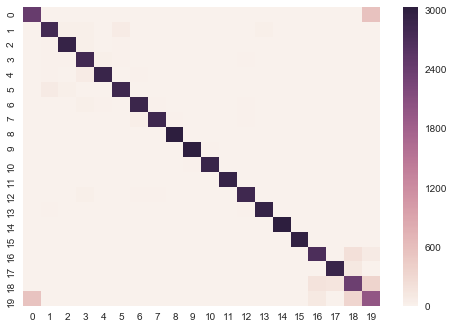

In [105]:
sns.heatmap(cm)

Classes 0 and 19 are more cofused with each other beacuse the are abour religion and atheisim which appear to share features that could be simialar and therefore misclassified. Also, classes, 16,17,& 18 all have the word "talk" in the lables which could be a part of an bigger overall category that shares similar features.

## Q2 - Performance vs. # Fetures Selected

### (a)

In [106]:
from random import shuffle 
def featureSizeAC(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_mean_fs: list.
        train_ci_fs: list.
        test_mean_fs: list.
        test_ci_fs: list.
        
    """
    feature_precentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    train_mean_fs = []
    train_ci_fs = []
    test_mean_fs = []
    test_ci_fs = []
    
    
    full_features = data.iloc[:,:-2].as_matrix()
    shufle_feature_cols_list = list(range(0,len(data.columns)-2))
    shuffle(shufle_feature_cols_list)
    print(shufle_feature_cols_list)
    target = data['target'].as_matrix()
    clf = LogisticRegression()
    #suffle features
    #shuffle(full_features)
    
    for c in feature_precentage:
        
        train_scores = []
        test_scores = []
        
        #correct for int error in split @ 1.0
        if c == 1.0:
            c = 1
        #use c% of features
        c_num = int(len(full_features[0])*c)
        print ("num cols is: " + str(c_num) )
        features_index = shufle_feature_cols_list[:c_num]
        features = full_features[:,features_index]
        
        
        for i in range(num_run):
            # separate datasets into training and test datasets once, no folding
            features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target)
            clfModel = clf.fit(features_train, target_train)
            target_pred = clfModel.predict(features_test)
            target_train_pred = clfModel.predict(features_train)
            train_scores.append(metrics.accuracy_score(target_train, target_train_pred))
            test_scores.append(metrics.accuracy_score(target_test, target_pred))    
        
        train_mean, train_ci = mean_confidence_interval(train_scores, confidence=0.95)
        test_mean, test_ci = mean_confidence_interval(test_scores, confidence=0.95)
        
        train_mean_fs.append(train_mean)
        train_ci_fs.append(train_ci)
        test_mean_fs.append(test_mean)
        test_ci_fs.append(test_ci)
        
        print(str(c) + " done")
        

    
    
    ###########         end         ###########
    return train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs

In [107]:
train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs = featureSizeAC(data, 'LR', 10, c=1.0)

[419, 33, 306, 61, 227, 149, 203, 441, 179, 462, 344, 6, 113, 100, 366, 95, 427, 363, 197, 485, 205, 321, 271, 479, 416, 312, 382, 335, 432, 287, 220, 377, 326, 443, 361, 51, 40, 331, 339, 277, 410, 263, 195, 122, 367, 286, 109, 236, 114, 56, 139, 421, 400, 165, 388, 219, 37, 49, 408, 24, 118, 323, 232, 180, 136, 450, 16, 498, 242, 81, 172, 291, 374, 84, 302, 215, 258, 343, 311, 160, 148, 69, 315, 140, 273, 275, 422, 445, 297, 98, 192, 159, 36, 368, 141, 389, 218, 119, 201, 167, 91, 213, 133, 103, 407, 187, 346, 340, 359, 449, 196, 185, 446, 260, 420, 381, 94, 67, 115, 391, 429, 234, 0, 151, 244, 52, 369, 87, 458, 88, 194, 467, 208, 452, 453, 313, 464, 329, 351, 399, 204, 484, 274, 231, 409, 8, 3, 76, 471, 488, 123, 492, 435, 373, 82, 437, 158, 341, 222, 404, 85, 86, 392, 155, 28, 53, 41, 318, 393, 80, 134, 13, 93, 461, 241, 47, 124, 238, 75, 334, 278, 487, 235, 130, 436, 230, 71, 111, 23, 27, 233, 89, 396, 304, 68, 365, 99, 60, 224, 21, 173, 251, 110, 385, 78, 269, 316, 5, 353, 256, 4

### (b)

In [109]:
def featureSizePlot(feature_size, train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(feature_size, test_mean_fs, color=sns.xkcd_rgb["pale red"], yerr=test_ci_fs)
    train_curve=plt.errorbar(feature_size, train_mean_fs,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_fs)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Feature Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Feature Size")
    plt.show()

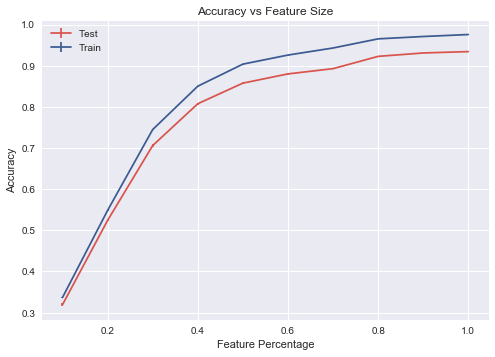

In [110]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs )

As the number of features increase the model becomes more accurate because it is able to account for more feature to more accuralty classify a document.  

## Q3 - Hyperparameter Tuning

In [111]:
def hyperParameterAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
    
    OUTPUT
        test_mean_hp: list.  mean accuracy list of test
        test_ci_hp: list. confidence interval list of test
        train_mean_hp: list. mean accuracy list of train
        train_ci_hp: list. confidence interval list of train
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    params = np.logspace(-4, 4, num=9)
    
    ########### your code goes here ###########
    test_mean_hp = []
    test_ci_hp = []
    train_mean_hp = []
    train_ci_hp = []

    
    for param in params:
        train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, clf, num_run, c=param)
        
        train_mean_hp.append(train_mean)
        train_ci_hp.append(train_ci)
        test_mean_hp.append(test_mean)
        test_ci_hp.append(test_ci)
        print(str(param) + " done.")
    
    ###########         end         ###########
    return train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp

In [112]:
train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp = hyperParameterAC(data, 'LR', 3)

0.0001 done.
0.001 done.
0.01 done.
0.1 done.
1.0 done.
10.0 done.
100.0 done.
1000.0 done.
10000.0 done.


In [113]:
def hyperParameterPlot(params, train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(params, test_mean_hp, color=sns.xkcd_rgb["pale red"], yerr=test_ci_hp)
    train_curve=plt.errorbar(params, train_mean_hp,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_hp)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Parameter')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Parameters")
    plt.show()

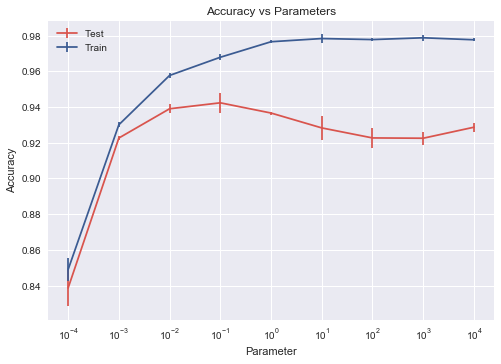

In [114]:
hyperParameterPlot(np.logspace(-4, 4, num=9),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )

The results shows that for the train data it flattens out at a peak becasue it is overfited. i.e The model is overfitted to the train data as the C parmeter in LR is the inverse of the regularization strength. 

In [115]:
#hyperParameterPlot(np.logspace(-4, 4, num=9),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )

## Q4 - Performance vs. Amount Data

### (a)

In [118]:
def dataSizeAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        test_mean_ds: list.  mean accuracy list of test
        test_ci_ds: list. confidence interval list of test
        train_mean_ds: list. mean accuracy list of train
        train_ci_ds: list. confidence interval list of train
        
        
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    data_precentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    test_mean_ds = []
    test_ci_ds = []
    train_mean_ds = []
    train_ci_ds = []
    clf = LogisticRegression()
    ########### your code goes here ###########
    
    features = data.iloc[:, :-2].as_matrix()
    data_rows = list(range(0,len(data.index)-1))
    target = data.iloc[:, -2].as_matrix()
    
    test_ds = []
    train_ds = []
    
    for run_n in range(num_run):
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, stratify=target)
        test_score_n = []
        train_score_n = []
        
        for k in data_precentage:
            print(run_n,k)
            percentage_rows = data_rows[:int(k*len(data_rows)*0.7)]
            k_features_train = features_train[percentage_rows,:]
            k_target_train = target_train[percentage_rows]
            
            clfModel = clf.fit(k_features_train, k_target_train)
            target_pred = clfModel.predict(features_test)
            target_pred_train = clfModel.predict(k_features_train)
            test_score_n.append(metrics.accuracy_score(target_test, target_pred))
            train_score_n.append(metrics.accuracy_score(k_target_train, target_pred_train))
            
        test_ds.append(test_score_n)
        train_ds.append(train_score_n)
    
    #get means and cis
    for k in range(0,len(data_precentage)):
        test_runs = []
        train_runs = []
        for run_n in range(num_run):
            test_runs.append(test_ds[run_n][k])
            train_runs.append(train_ds[run_n][k])
        
        test_mean_ds.append(mean_confidence_interval(test_runs)[0])
        test_ci_ds.append(mean_confidence_interval(test_runs)[1])
        train_mean_ds.append(mean_confidence_interval(train_runs)[0])
        train_ci_ds.append(mean_confidence_interval(train_runs)[1])

    
    print("DONE")
    ###########         end         ###########
    return train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds

In [119]:
train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds = dataSizeAC(data, 'LR', 3)

0 0.1
0 0.2
0 0.3
0 0.4
0 0.5
0 0.6
0 0.7
0 0.8
0 0.9
0 1.0
1 0.1
1 0.2
1 0.3
1 0.4
1 0.5
1 0.6
1 0.7
1 0.8
1 0.9
1 1.0
2 0.1
2 0.2
2 0.3
2 0.4
2 0.5
2 0.6
2 0.7
2 0.8
2 0.9
2 1.0
DONE


### (b)

In [120]:
def dataSizePlot(datasize, train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(datasize, test_mean_ds, color=sns.xkcd_rgb["pale red"], yerr=test_ci_ds)
    train_curve=plt.errorbar(datasize, train_mean_ds,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_ds)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Data Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Data Percentage")
    plt.show()

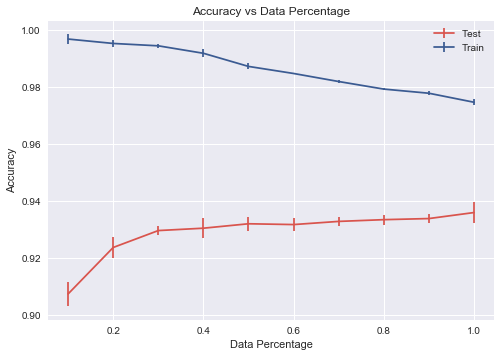

In [121]:
dataSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

As the amount of train data increases the model performs beter on the test beacsue it has more inforamtion availbe to accurate calssify new document. The train performance slightly decreases becasue a very small data set is close to a one-to-one mapping of already seen data but as it increses, it lesser of case.

## Q5 - Perfomance vs Feature Encoding

### (a)

In [122]:
data_t = data[:1].values.tolist()
print("Term frequency")
data[600:601]
#data_t



Term frequency


,comp,sci,rec,misc,talk,polit,religion,sport,sys,hardwar,...,author,requir,stratus,million,start,relat,rather,although,target,label
600,0,0,0,0,4,7,0,0,0,0,...,0,0,0,5,0,1,0,0,17,20_newsgroups\talk.politics.mideast\75370


In [123]:
data_b = dataPreprocessor(k=500, fs='tf', encode='boolean', directorydf=directorydf, size=None)

[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files
processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processe

C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


processed 1 files
processed 1001 files
processed 2001 files
processed 3001 files
processed 4001 files
processed 5001 files
processed 6001 files
processed 7001 files
processed 8001 files
processed 9001 files
processed 10001 files
processed 11001 files
processed 12001 files
processed 13001 files
processed 14001 files
processed 15001 files
processed 16001 files
processed 17001 files
processed 18001 files
processed 19001 files
BOOL
DONE PREPROCSSING


In [137]:
data_b.columns.tolist()

['comp',
 'rec',
 'sci',
 'misc',
 'polit',
 'talk',
 'religion',
 'sys',
 'sport',
 'hardwar',
 'window',
 'atheism',
 'christian',
 'soc',
 'hockey',
 'alt',
 'forsal',
 'hedrick',
 'crypt',
 'arami',
 'mideast',
 'motorcycl',
 'basebal',
 'med',
 'igor',
 'rutger',
 'auto',
 'pc',
 'graphic',
 'os',
 'gun',
 'approv',
 'electron',
 'ms',
 'mac',
 'space',
 'ibm',
 'refer',
 'x',
 'atho',
 'xref',
 'clipper',
 'apr',
 'god',
 'govern',
 'team',
 'cultur',
 'game',
 'geneva',
 'car',
 'sale',
 'write',
 'encrypt',
 'israel',
 'bike',
 'moral',
 'chip',
 'peopl',
 'secur',
 'season',
 'say',
 'jewish',
 '93',
 'arab',
 'law',
 'jew',
 'player',
 'key',
 'may',
 'jesus',
 'isra',
 'appl',
 'turkish',
 'bibl',
 'believ',
 'card',
 'file',
 'abort',
 'fbi',
 'thank',
 'program',
 'org',
 'orbit',
 'eff',
 'astro',
 'imag',
 'privaci',
 'dos',
 'war',
 'countri',
 'disk',
 'christ',
 'drive',
 'clinton',
 'articl',
 'atheist',
 'muslim',
 'human',
 'nasa',
 'play',
 'scsi',
 'church',
 'ko

In [125]:
print("Boolean")
data_b[600:601]

Boolean


,comp,rec,sci,misc,polit,talk,religion,sys,sport,hardwar,...,better,berkeley,activ,place,ii,feel,1993apr22,zaphod,target,label
600,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,17,20_newsgroups\talk.politics.mideast\75370


### (b)

You should be able to get this answer easily by running dataPreprocessor fuction and randomSplitCI function

In [126]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Term Frequency")
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

print("Boolean")
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data_b, 'LR', 10, c=1.0)
print("Term Frequency")
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Term Frequency
Train    
Result of trails:[0.97335143244981071, 0.97620918768307496, 0.97428020290062156, 0.97649496320640139, 0.97456597842394799, 0.97549474887475884, 0.97763806529970709, 0.97628063156390654, 0.97613774380224339, 0.9779952847038651]     
Average Accuracy: 0.9758448238908339     
Confidence Interval: 0.0007919938088439234

Test    
Result of trails:[0.9395, 0.9325, 0.94133333333333336, 0.92766666666666664, 0.93899999999999995, 0.93500000000000005, 0.9325, 0.9335, 0.93300000000000005, 0.93000000000000005]     
Average Accuracy: 0.9343999999999999     
Confidence Interval: 0.002365167243801856
Boolean
Term Frequency
Train    
Result of trails:[0.9810673715796242, 0.97985282560548692, 0.97999571336715008, 0.98013860112881335, 0.98242480531542475, 0.97999571336715008, 0.97985282560548692, 0.9807101521754662, 0.98021004500964493, 0.97906694291633922]     
Average Accuracy: 0.9803314996070587     
Confidence Interval: 0.0004930974009405302

Test    
Result of trails:[0.9449

The boolean feature encondong perfomed slightly better than the TF on this dataset. I believe this occurs becasue the news article dataset may be slightly biased towards classifing articles based on wether or not a feature ocurus rather than the number of times it occurs.

## Q6 - Comparision vs. Naive Bayes

### (a)

In [124]:
data_LR = dataPreprocessor(k=100, fs='LR', encode='tf', directorydf=directorydf, size=1500)
data_NB = dataPreprocessor(k=100, fs='NB', encode='tf', directorydf=directorydf, size=1500)


[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
processed 1 files
processed 1001 files
Done at 1500
processed 1 files
processed 1001 files
Done at 1500


C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


processed 1 files
processed 1001 files
Done at 1500
DONE PREPROCSSING
[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
processed 1 files
processed 1001 files
Done at 1500
processed 1 files
processed 1001 files
Done at 1500


C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


processed 1 files
processed 1001 files
Done at 1500
DONE PREPROCSSING


In [127]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Logistic Regrssion")
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'NB', 10, c=1.0)
print("Naive Bayes")
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Logistic Regrssion
Test    
Result of trails:[0.93283333333333329, 0.92766666666666664, 0.93466666666666665, 0.93533333333333335, 0.9371666666666667, 0.93466666666666665, 0.93483333333333329, 0.9355, 0.93400000000000005, 0.93500000000000005]     
Average Accuracy: 0.9341666666666667     
Confidence Interval: 0.0013783446089603482
Naive Bayes
Test    
Result of trails:[0.63749999999999996, 0.63066666666666671, 0.6323333333333333, 0.64266666666666672, 0.61483333333333334, 0.625, 0.62, 0.6333333333333333, 0.61333333333333329, 0.59750000000000003]     
Average Accuracy: 0.6247166666666667     
Confidence Interval: 0.007347990751191433


The Logistic regressoin performed better than Niave Bayes on ths data set becasue NB assumes all features are conditonally independent and since some of the features here are not (eg. Jesus and Religion) it would not perfom well. Whereas since LR splits the feature space linearly, the corealltion of features does not affect the model.

# Code Validation

In [141]:
assert(isinstance(data, pd.DataFrame)), "data should be pandas dataframe type"

assert(isinstance(train_scores, list)), "train_scores should be list type"
assert(isinstance(test_scores, list)), "test_scores should be list type"
assert(isinstance(train_mean, float)), "train_mean should be float type"
assert(isinstance(test_mean, float)), "test_mean should be float type"
assert(isinstance(train_ci, float)), "train_ci should be float type"
assert(isinstance(test_ci, float)), "test_ci should be float type"

assert(isinstance(cm, pd.DataFrame)), "Confusion matrix should be pandas dataframe type"

assert(isinstance(train_mean_fs, list)), "train_mean_fs should be list type"
assert(isinstance(test_mean_fs, list)), "test_mean_fs should be list type"
assert(isinstance(train_ci_fs, list)), "train_ci_fs should be list type"
assert(isinstance(test_ci_fs, list)), "test_ci_fs should be list type"
assert(len(train_mean_fs)==len(train_ci_fs)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_fs)==len(test_ci_fs)), \
"list length of mean and confidence interval are not equal(test)"


assert(isinstance(train_mean_hp, list)), "train_mean_hp should be list type"
assert(isinstance(test_mean_hp, list)), "test_mean_hp should be list type"
assert(isinstance(train_ci_hp, list)), "train_ci_hp should be list type"
assert(isinstance(test_ci_hp, list)), "test_ci_hp should be list type"
assert(len(train_mean_hp)==len(train_ci_hp)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_hp)==len(test_ci_hp)), \
"list length of mean and confidence interval are not equal(test)"

train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds
assert(isinstance(train_mean_ds, list)), "train_mean_ds should be list type"
assert(isinstance(test_mean_ds, list)), "test_mean_ds should be list type"
assert(isinstance(train_ci_ds, list)), "train_ci_ds should be list type"
assert(isinstance(test_ci_ds, list)), "test_ci_ds should be list type"
assert(len(train_mean_ds)==len(train_ci_ds)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_ds)==len(test_ci_ds)), \
"list length of mean and confidence interval are not equal(test)"




### Refrences
I collaborated with Kamil Yilanci on this assignment.